In [15]:
%matplotlib inline

In [16]:
# pip install geopandas plotly descartes

In [49]:
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib
import pandas as pd
import geopandas # we'll use this to read shapefiles
import numpy as np
from shapely.geometry import Polygon, Point, shape
df = pd.read_csv('Madison_crash_2009_2019.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df['ACCDDATE'] = pd.to_datetime(df['ACCDDATE'])
inj = df[df["ACCDTYPE"] == "BIKE"].reset_index()
inj.head()

,index,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,...,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG
0,1348,9BGG3T2,2010-09-22,15,SW,DANE,MADISON,C,12.0,E,...,0.0,47.0,M,C,NaN,NaN,,,43.033278,-89.407738
1,1475,9BL0RRV,2012-01-09,10,SW,DANE,MADISON,C,12.0,E,...,15.0,53.0,M,,HLMT,NaN,,,43.033609,-89.407500
2,1485,9BFSV9J,2011-05-13,22,SW,DANE,MADISON,C,12.0,E,...,30.0,41.0,M,B,NONE,FTY,346.37 1 C 3,,43.033609,-89.407500
3,1753,9BBVPQD,2011-06-25,21,SW,DANE,MADISON,C,12.0,E,...,30.0,23.0,F,,EYE,NaN,,,43.039670,-89.378781
4,2158,9BD8644,2014-07-15,7,SW,DANE,MADISON,C,12.0,E,...,77.0,25.0,M,B,HLMT,NaN,,,43.045449,-89.306499


In [19]:
inj['loc'] = ""
for i in range(len(inj)):
    if np.isnan(inj.WISLR_LATDECDG[i]) or np.isnan(inj.WISLR_LONDECDG[i]):
        inj["loc"][i] = None
    else:
        inj["loc"][i] = Point(inj.WISLR_LONDECDG[i],inj.WISLR_LATDECDG[i])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
inj = inj.dropna(subset=['loc'])
inj = geopandas.GeoDataFrame(inj, geometry='loc')
inj

,index,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,...,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG,loc
0,1348,9BGG3T2,2010-09-22,15,SW,DANE,MADISON,C,12.0,E,...,47.0,M,C,NaN,NaN,,,43.033278,-89.407738,POINT (-89.40774 43.03328)
1,1475,9BL0RRV,2012-01-09,10,SW,DANE,MADISON,C,12.0,E,...,53.0,M,,HLMT,NaN,,,43.033609,-89.407500,POINT (-89.40750 43.03361)
2,1485,9BFSV9J,2011-05-13,22,SW,DANE,MADISON,C,12.0,E,...,41.0,M,B,NONE,FTY,346.37 1 C 3,,43.033609,-89.407500,POINT (-89.40750 43.03361)
3,1753,9BBVPQD,2011-06-25,21,SW,DANE,MADISON,C,12.0,E,...,23.0,F,,EYE,NaN,,,43.039670,-89.378781,POINT (-89.37878 43.03967)
4,2158,9BD8644,2014-07-15,7,SW,DANE,MADISON,C,12.0,E,...,25.0,M,B,HLMT,NaN,,,43.045449,-89.306499,POINT (-89.30650 43.04545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,53706,A024348,2009-08-26,23,SW,DANE,MADISON,C,NaN,NaN,...,29.0,M,B,NONE,NaN,,,43.092039,-89.355198,POINT (-89.35520 43.09204)
536,53739,01L091L4FS,2017-08-07,9,SW,DANE,MADISON,C,NaN,NaN,...,41.0,F,,SH/LP,NaN,NaN,NaN,43.088443,-89.357984,POINT (-89.35798 43.08844)
537,53778,01L0GMH5JZ,2018-09-03,14,SW,DANE,MADISON,C,NaN,NaN,...,40.0,M,B,NaN,NaN,NaN,NaN,43.091083,-89.355932,POINT (-89.35593 43.09108)
538,54063,9B6T74R,2015-08-21,7,SW,DANE,MADISON,C,NaN,NaN,...,20.0,F,B,NaN,NaN,,,43.146176,-89.371107,POINT (-89.37111 43.14618)


In [21]:
roads = geopandas.read_file("Madison-shp/shape/roads.shp")
roads.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,4705464,Mineral Point Road,None,secondary,1,0,NaN,"LINESTRING (-89.50267 43.06062, -89.50253 43.0..."
1,4709908,None,I 39;I 90,motorway,1,0,70.0,"LINESTRING (-89.28577 43.11006, -89.28563 43.1..."
2,4709949,None,None,motorway_link,1,0,NaN,"LINESTRING (-89.29664 43.13685, -89.29682 43.1..."
3,4710035,None,None,motorway_link,1,0,NaN,"LINESTRING (-89.30082 43.13351, -89.30101 43.1..."
4,4710039,American Parkway,None,tertiary,1,0,NaN,"LINESTRING (-89.28261 43.14461, -89.28279 43.1..."


In [22]:
roads["type"].unique()

array(['secondary', 'motorway', 'motorway_link', 'tertiary', 'service',
       'trunk', 'primary', 'trunk_link', 'residential', 'path',
       'secondary_link', 'cycleway', 'track', 'unclassified',
       'tertiary_link', 'pedestrian', 'footway', 'construction',
       'primary_link', 'steps', 'proposed', 'bridleway', 'platform',
       'corridor'], dtype=object)

In [125]:
cycle_way = roads[roads["type"] == "cycleway"]

filter_list = ['tertiary_link','cycleway',"residential",'bridleway','footway','construction','steps','footways','motorway_link','trunk_link','track','unclassified','pedestrian','steps','proposed',"construction",'tertiary','motorway','platform','corridor','service',"path"]
#big_list = ["residential"]

for f in filter_list:
    roads = roads[roads["type"] != f]
roads.head()
line_new = list(shape(roads["geometry"][0]).coords)
line_new
print(min(line_new),max(line_new))

(-89.5026705, 43.0606153) (-89.486514, 43.0607291)


In [24]:
roads["type"].unique()

array(['secondary', 'trunk', 'primary', 'secondary_link', 'primary_link'],
      dtype=object)

In [25]:
city = geopandas.read_file("City_Limit/City_Limit.shp")
lakes = geopandas.read_file("lakes/Potential_Standing_Water.shp")

In [127]:
bike_path = geopandas.read_file("Bike_Paths/Bike_Paths.shp")
bike_path

,OBJECTID,Off_Type,BFuncClass,Status,Year,Pri_Name,Sec_Name,Jurisdicti,Surface,BikePaWdth,...,created_us,created_da,last_edite,last_edi_1,DIR_INDC,BFuncCla_1,ShapeSTLen,MapOffset,ExtID,geometry
0,248679,Shared-Use Path,None,Planned - Feasible,None,None,None,Village of DeForest,Paved,10.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLDMS,2018-02-27T13:42:57.000Z,Primary,Secondary,6916.084361,None,1.0,"LINESTRING (-89.34419 43.25987, -89.34666 43.2..."
1,248680,Shared-Use Path,Primary,Existing,None,None,None,Village of DeForest,Unpaved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2019-10-01T14:48:59.000Z,Primary,Secondary,1882.042262,None,2.0,"LINESTRING (-89.35601 43.24409, -89.35595 43.2..."
2,248681,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Unpaved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2019-10-01T14:43:14.000Z,Primary,None,288.784697,None,3.0,"LINESTRING (-89.34959 43.24586, -89.34965 43.2..."
3,248682,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Unpaved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLDMS,2018-02-27T13:42:57.000Z,Primary,None,234.726468,None,4.0,"LINESTRING (-89.35136 43.24495, -89.35131 43.2..."
4,248683,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2019-10-01T15:15:49.000Z,Primary,Secondary,109.022606,None,5.0,"LINESTRING (-89.35852 43.24424, -89.35857 43.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,251424,Shared-Use Path,Secondary,Existing,None,Stoughton - Lower Yahara River Trail,None,City of Stoughton,Unpaved,10.0,...,PLWJH,2019-10-10T15:39:42.000Z,PLWJH,2019-10-10T15:43:01.000Z,Primary,None,2808.546962,None,440.0,"LINESTRING (-89.20273 42.94053, -89.20272 42.9..."
2746,251425,Municipal Lot,Secondary,Existing,None,Stoughton - Lower Yahara River Trail,None,City of Stoughton,Unpaved,10.0,...,PLWJH,2019-10-10T15:39:47.000Z,PLWJH,2019-10-10T15:40:53.000Z,Primary,None,177.206734,None,440.0,"LINESTRING (-89.20174 42.93330, -89.20173 42.9..."
2747,251426,Pedestrian Path on Bike Network,None,Existing,None,None,None,None,Paved,6.0,...,PLWJH,2019-10-11T15:00:13.000Z,PLWJH,2019-10-11T15:00:13.000Z,Primary,None,359.470204,None,NaN,"LINESTRING (-89.21816 42.92329, -89.21900 42.9..."
2748,251427,Municipal Lot,None,Existing,None,None,None,None,Unpaved,8.0,...,PLWJH,2019-10-14T08:45:35.000Z,PLWJH,2019-10-14T08:45:52.000Z,Primary,None,71.600668,None,NaN,"LINESTRING (-89.21312 42.91313, -89.21312 42.9..."


In [118]:
bike_path["Status"].unique()

array(['Planned - Feasible', 'Existing', 'Programmed',
       'Planned - Obstacles', 'Conceptual', 'Under Construction',
       'Platted'], dtype=object)

In [128]:
bike_path = bike_path[bike_path["Status"] == "Existing"]
bike_path = bike_path[bike_path["ShapeSTLen"] < 1000]
drop_list = []
for i, line in enumerate(list(bike_path["geometry"])):
    try:
        line_new = list(shape(line).coords)
        if min(line_new)[0] < -89.5026705:
            drop_list.append(i)
        if max(line_new)[0] > -89.256: 
            drop_list.append(i)
        if min(line_new)[1] < -89.5026705:
            drop_list.append(i)
        if max(line_new)[1] > -89.256: 
            drop_list.append(i)
    except:
        drop_list.append(i)

bike_path.drop(bike_path.index[drop_list], inplace = True)

bike_path

,OBJECTID,Off_Type,BFuncClass,Status,Year,Pri_Name,Sec_Name,Jurisdicti,Surface,BikePaWdth,...,created_us,created_da,last_edite,last_edi_1,DIR_INDC,BFuncCla_1,ShapeSTLen,MapOffset,ExtID,geometry
2,248681,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Unpaved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2019-10-01T14:43:14.000Z,Primary,None,288.784697,None,3.0,"LINESTRING (-89.34959 43.24586, -89.34965 43.2..."
3,248682,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Unpaved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLDMS,2018-02-27T13:42:57.000Z,Primary,None,234.726468,None,4.0,"LINESTRING (-89.35136 43.24495, -89.35131 43.2..."
4,248683,Shared-Use Path,None,Existing,None,None,None,Village of DeForest,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2019-10-01T15:15:49.000Z,Primary,Secondary,109.022606,None,5.0,"LINESTRING (-89.35852 43.24424, -89.35857 43.2..."
15,248694,Pedestrian Path on Bike Network,None,Existing,None,None,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-06-05T14:07:21.000Z,Primary,None,176.265655,None,17.0,"LINESTRING (-89.30563 43.13953, -89.30570 43.1..."
16,248695,Pedestrian Path on Bike Network,Secondary,Existing,None,None,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-06-05T14:06:28.000Z,Primary,None,150.213609,None,18.0,"LINESTRING (-89.30695 43.13911, -89.30693 43.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,251416,Municipal Lot,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-04T11:53:54.000Z,PLWJH,2019-10-04T11:53:54.000Z,Primary,None,126.841080,None,NaN,"LINESTRING (-89.49098 43.12225, -89.49146 43.1..."
2740,251419,Shared-Use Path,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-08T13:15:03.000Z,PLWJH,2019-10-08T13:15:40.000Z,Primary,None,420.322171,None,NaN,"LINESTRING (-89.33500 43.02850, -89.33347 43.0..."
2742,251421,Shared-Use Path,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-08T13:24:49.000Z,PLWJH,2019-10-08T13:24:49.000Z,Primary,None,58.286517,None,NaN,"LINESTRING (-89.36496 43.02249, -89.36511 43.0..."
2744,251423,Municipal Lot,Secondary,Existing,None,None,None,Village of McFarland,Paved,10.0,...,PLWJH,2019-10-10T15:12:59.000Z,PLWJH,2019-10-10T15:13:58.000Z,Primary,None,141.142065,None,443.0,"LINESTRING (-89.29528 43.00507, -89.29532 43.0..."


# Bike Accidents in Madison
## Plot for Nov 7
### City Plot
1. <p style="color:Blue">Blue Line</p>Bike paths
2. <p style="color:Green">Green Line</p>Primary roads
3. <p style="color:DarkRed">Red Point</p>Bike Accidents

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


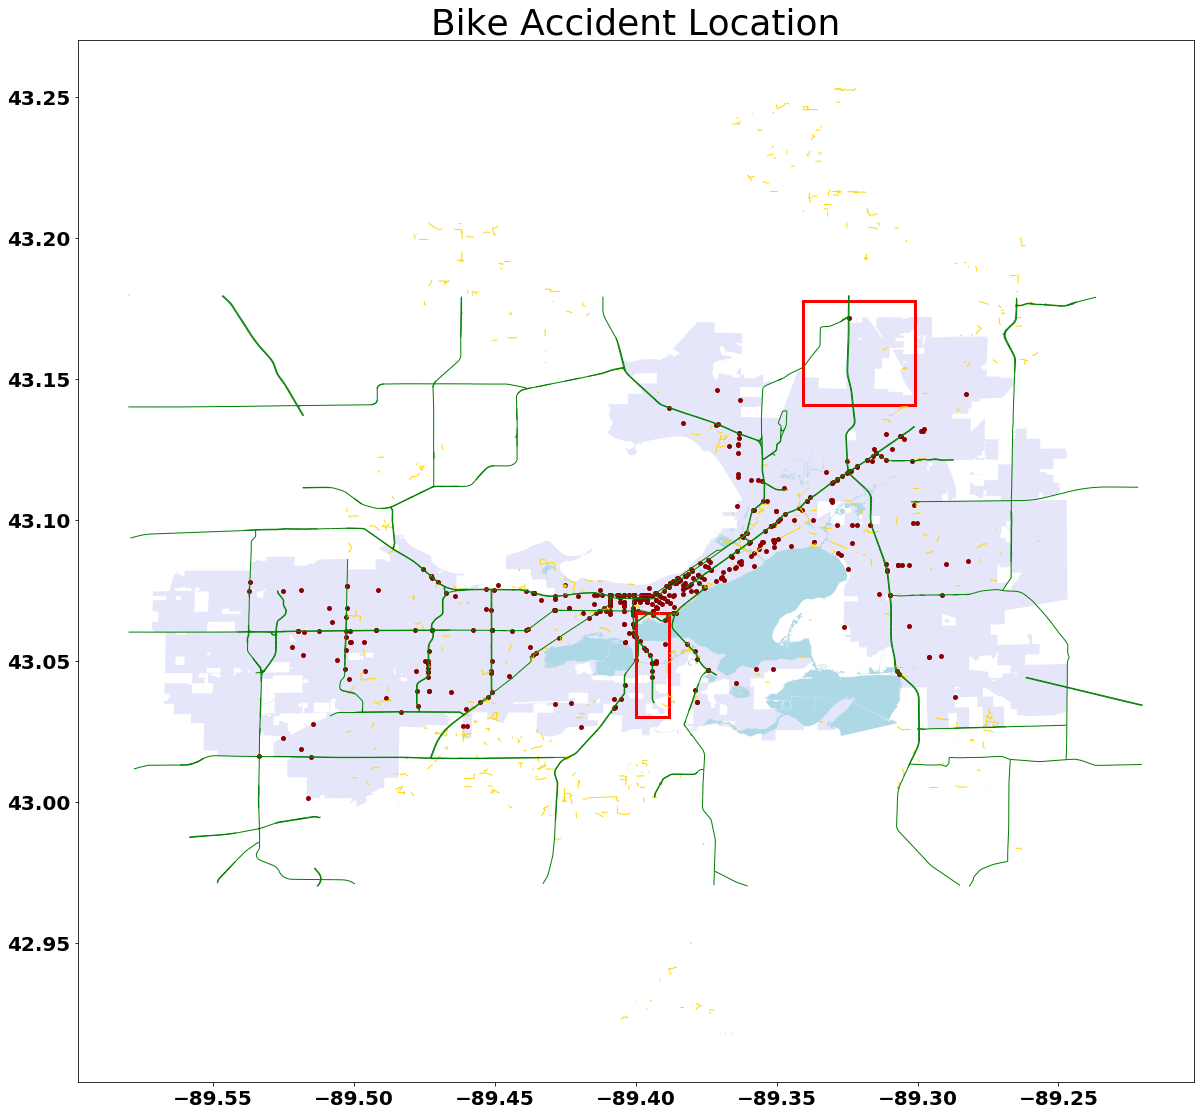

In [129]:
ax = city.plot(color="lavender", figsize=(20,20))
font = {'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
bike_path.plot(color = "gold",ax=ax, lw = 1)
plt.title("Bike Accident Location")
ax.tick_params(axis='both', which='major', labelsize=20)
p = patches.Rectangle((0.5, 0.35), 0.03, 0.1,
    fill=False, transform=ax.transAxes, clip_on=False
    ,color="red",lw = 3
    )
p2 = patches.Rectangle((0.65, 0.65), 0.1, 0.1,
    fill=False, transform=ax.transAxes, clip_on=False
    ,color="red",lw = 3
    )
ax.add_patch(p)
ax.add_patch(p2)
lakes.plot(color="lightblue", ax=ax)
cycle_way.plot(color="darkblue", ax = ax, lw = 3)
roads.plot(color = "green",ax=ax, lw = 1)
inj.plot(color = "darkred",ax=ax, lw = 2, marker=".")


# Takeaway:
1. Some road (as the red rectangle indicated) have accident clustered but no bike path on it, making it a potential candidate for installation suggestions.
2. The major universtiy area might need more bike paths or a redesign of the bike paths.
